# Performance analysis

Let us study the performance of the new version of the code, considering fidelity, loss and runtime. In this study we choose the default configuration `CFG`, observing the effect of modifying the system size and the use of an extra ancilla.

In [2]:
import pickle
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
results = {}
iters = 10
sizes = [2, 3, 4, 5]

for size in sizes:
    for ancilla in [False, True]:
        for i in range(iters):
            name = f'qgan_size{size}_ancilla{ancilla}_iter{i}.pkl'
            with open(name, 'rb') as f:
                loaded_data = pickle.load(f)

            # Store results in a nested dictionary structure
            results.setdefault(size, {}).setdefault(ancilla, {})[i] = loaded_data

In [ ]:
results = {}
iters = 10
sizes = [2, 3, 4, 5]

for size in sizes:
    for ancilla in [False, True]:
        for i in range(iters):
            name = f'qgan_size{size}_ancilla{ancilla}_iter{i}.pkl'
            with open(name, 'rb') as f:
                loaded_data = pickle.load(f)

            # Store results in a nested dictionary structure
            results.setdefault(size, {}).setdefault(ancilla, {})[i] = loaded_data

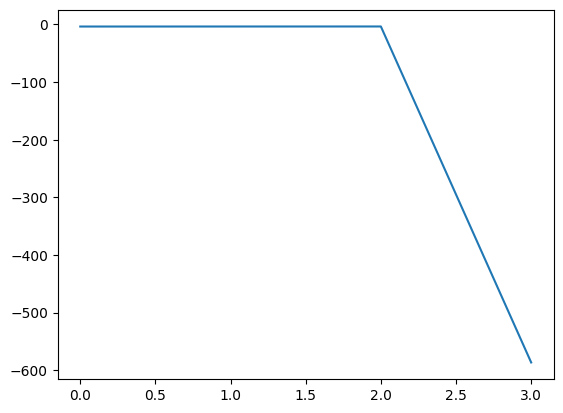

In [ ]:
for size in results:
    for ancilla in results[size]:
        fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
        fig.suptitle(f"System Size {size} | Ancilla: {ancilla}", fontsize=16)

        for i, run in results[size][ancilla].items():
            axs[0].plot(run.fidelities, label=f'Run {i}')
            axs[1].plot(run.losses, label=f'Run {i}')
            axs[2].plot(run.runtimes, label=f'Run {i}')

        axs[0].set_ylabel('Fidelity')
        axs[1].set_ylabel('Loss')
        axs[2].set_ylabel('Runtime (s)')
        axs[2].set_xlabel('Iteration')

        for ax in axs:
            ax.grid(True)
            ax.legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()


In [9]:
import numpy as np
np.cumsum(loaded_data.runtimes)

array([ 1.4306726,  2.5974397,  3.7213281,  4.8728396,  6.3817249,
        8.4652438,  8.5853693,  8.7120699,  8.8458487,  8.972637 ,
        9.1208133,  9.2592555,  9.4057611,  9.5353016,  9.6605882,
        9.7789006,  9.912407 , 10.0629071, 10.1913958, 10.3250491,
       10.4591706, 10.5899513, 10.7329663, 10.8667074, 11.0014781,
       11.1488783, 11.2844134, 11.4222908, 11.546158 , 11.6731133,
       11.8056874, 11.9528707, 12.0738008, 12.1903926, 12.3139394,
       12.4413123, 12.5594911, 12.6828196, 12.8098427, 12.9476975,
       13.0880304, 13.2073299, 13.3436978, 13.4806145, 13.6107801,
       13.7399492, 13.8785518, 14.0247439, 14.1667957, 14.3096641,
       14.4783642, 14.6101852, 14.7486423, 14.8816276, 15.0111306,
       15.1339338, 15.2654992, 15.4001958, 15.5241652, 15.6569441,
       15.7830619, 15.9169438, 16.0451687, 16.1751527, 16.3072281,
       16.4640021, 16.6062609, 16.7365906, 16.8649659, 16.9873122,
       17.1235107, 17.249568 , 17.3992693, 17.5258518, 17.6598